### 문서 군집화
- 군집분석은 비지도 학습으로 비슷한 데이터들끼리 서로 군집을 이루는 것을 말한다. 이러한 방법은 텍스트로 이루어진 문서 데이터에도 적용이 된다. 
- 단어 발생 빈도수에 기반하는 BOW(Bag Of Words) 방식을 이용해 Feature(문서들을 이루고 있는 단어들)를 벡터화시키거나 단어들간의 의미 관계 즉, 단어 벡터들간의 방향을 고려해 Word embedding을 통해 벡터화 시킨다. 

#####  K-means를 활용한 Document Clustering
- 여기서는 BOW에 기반한 Tf-idf 방법을 사용한다. 다른 BOW 방식인 Count Vectorizer는 단순히 그저 단어 발생 빈도수에만 초점을 맞추기 때문에 여러가지 문서들간의 관계를 잘 고려하지 못한다. 

In [70]:
import pandas as pd
import glob, os

# 이스케이프 기능을 무시하고 그대로 문자열로 출력하고 싶을 때가 생긴다. 
# 그럴 때는 문자열 앞에 r을 붙이면 문자열 안에서 백 슬래시를 이스케이프 문자로 해석하지 않고 형태 그대로 출력
path = r'C:\cakd5\workspace\m8_머신러닝적용\dataset\OpinosisDataset1.0\topics'

# path로 지정한 디렉터리 밑에 있는 모든 .data 파일의 파일명을 리스트로 취합
all_files = glob.glob(os.path.join(path, "*.data"))    
filename_list = []
opinion_text = []

# 개별 파일들의 파일명은 filename_list로 취합
# 개별 파일들의 파일내용은 DataFrame 로딩 후 다시 string으로 변환하여 opinion_text list로 취합
for file_ in all_files:
    # 개별 파일을 읽어서 DataFrame으로 생성, 첫번째 행이 칼럼 이름이라면 header=0 으로 지정
    df = pd.read_table(file_,index_col=None, header=0,encoding='latin1')
    
    # 경로 등 제거 후 순수 파일명만 저장
    # 절대경로로 주어진 file명을 가공. 만일 Linux에서 수행시에는 아래 \\를 / 변경, 맨 마지막 .data 확장자도 제거
    filename_ = file_.split('\\')[-1] # \\로 분리
    filename = filename_.split('.')[0] # 점으로 분리

    # 빈 그릇 만들어놓은 filne_list에 append함수 이용해 파일명과 파일 내용 뿌려줌
    filename_list.append(filename)
    opinion_text.append(df.to_string())

# 파일명 리스트와 파일내용 리스트 객체를 DataFrame으로 생성
document_df = pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})
document_df.head()

,filename,opinion_text
0,accuracy_garmin_nuvi_255W_gps,", and is very, very accurate .\n0 but for the most part, we find that t..."
1,bathroom_bestwestern_hotel_sfo,"The room was not overly big, but clean and very comfortable beds, a great shower and very clean bathrooms .\n0 ..."
2,battery-life_amazon_kindle,"After I plugged it in to my USB hub on my computer to charge the battery the charging cord design is very clever !\n0 After you have paged tru a 500, page book..."
3,battery-life_ipod_nano_8gb,short battery life I moved up from an 8gb .\n0 ...
4,battery-life_netbook_1005ha,"6GHz 533FSB cpu, glossy display, 3, Cell 23Wh Li, ion Battery , and a 1 .\n0 ..."


In [71]:
import pandas as pd
# 보기 너비 증가
pd.set_option('display.max.colwidth', 500)
document_df.head()

# 각 filename 자체만으로 의견(opinion)의 text가 어떠한 제품/서비스에 대한 리뷰인지 잘 알 수 있다.

,filename,opinion_text
0,accuracy_garmin_nuvi_255W_gps,", and is very, very accurate .\n0 but for the most part, we find that t..."
1,bathroom_bestwestern_hotel_sfo,"The room was not overly big, but clean and very comfortable beds, a great shower and very clean bathrooms .\n0 ..."
2,battery-life_amazon_kindle,"After I plugged it in to my USB hub on my computer to charge the battery the charging cord design is very clever !\n0 After you have paged tru a 500, page book..."
3,battery-life_ipod_nano_8gb,short battery life I moved up from an 8gb .\n0 ...
4,battery-life_netbook_1005ha,"6GHz 533FSB cpu, glossy display, 3, Cell 23Wh Li, ion Battery , and a 1 .\n0 ..."


In [72]:
document_df.loc[0,'opinion_text']

"                                                                                                                                                                                                                                                               , and is very, very accurate .\n0                                                                                                                                                                           but for the most part, we find that the Garmin software provides accurate directions, whereever we intend to go .\n1                                                                                                              This function is not accurate if you don't leave it in battery mode say, when you stop at the Cracker Barrell for lunch and to play one of those trangle games with the tees .\n2                                                                                                                                         

### 데이터프레임 만들어놓고 벡터화 해주기 전에 데이터 전처리 작업
- Lemmatization (문법적 또는 의미적으로 변하는 단어의 원형을 찾는 방법)

##### 각 opinion_text에 들어있는 여러 문장들을 토큰화시키고 동시에 어근을 추출해주기 위해 NLTK의 Lemmatize 함수를 사용해보자.

In [73]:
# 텍스트 단어들의 어근 원형을 추출하기 위해 함수 생성
# 각 opinion_text에 들어있는 여러 문장들을 토큰화시키고 동시에 어근을 추출해주기 위해 NLTK의 Lemmatize 함수를 사용
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
import nltk
import string
import warnings
warnings.filterwarnings('ignore')

lemmar = WordNetLemmatizer()

# 토큰화한 각 단어들의 원형들을 리스트로 담아서 반환
def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

# string.puncutaion에 문자열의 모든 구두점이 들어있음 -> 이를 활용해서 Tokenize시킬 때 구두점들을 제외하기 위한 것
# ord('문자열') => 문자열의 ASCII코드를 반환해줌!
# dict(key, value)형태로 모든 구두점의 각 ASCII코드를 key값으로 넣어주고 value는 None값으로 초기화

# 특수 문자 사전 생성: {33: None ...}
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)

# 특수 문자 제거 및 단어 원형 추출
def LemNormalize(text):
    # .translate인자에 구두점 dict넣어주어서 구두점 삭제해준 상태로 토큰화
    # 텍스트 소문자 변경 후 특수 문자 제거
    text_new = text.lower().translate(remove_punct_dict)
    
    # 단어 토큰화
    word_tokens = nltk.word_tokenize(text_new)
    
     # 단어 원형 추출
    return LemTokens(word_tokens)

In [74]:
# TF-IDF 형태로 피처 벡터화시키면서 cusotmized해준 토큰화 + 어근추출 방식 tokenizer인자에 넣어주기
# 벡터화시킬 TF-IDF 도구 옵션 추가해서 구축
# 1,2 ngram적용, 빈도수 0.05이하, 0.85이상의 빈도수 단어들 제거하는 객체 생성
tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize,
                            stop_words='english', ngram_range=(1,2),
                            min_df=0.05, max_df=0.85)

# fit_transform으로 위에서 구축한 객체로 텍스트 벡터화
# opinion_text 칼럼 값으로 피처 벡터화 수행
# TfidfVectorizer의 fit_transform()의 인자로 document_df DataFrame의 opinion_text 칼럼을 입력하면
# 개별 문서 텍스트에 대해 TF-IDF로 변환한 피처 벡터화된 행렬을 구할 수 있다.
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

##### 각 문서들을 토큰화시키면서 어근을 추출했고 Tf-idf에 기반하여 단어들을 벡터화시켜 Feature들로 만드는 과정까지 마쳤다. 이제 K-means 알고리즘에 학습시켜 문서끼리 군집화를 시켜보자.
- 문서별 텍스트가 TF-IDF 변환된 피처 벡터화 행렬 데이터에 대해서 군집화를 수행해 어떤 문서끼리 군집되어있는지 확인이 가능하다

In [75]:
from sklearn.cluster import KMeans

# 5개 집합으로 군집화 수행
# KMeans를 수행한 후에 군집의 Label 값과 중심별로 할당된 데이터 세트의 좌표 값을 구할 수 있다.
km_cluster = KMeans(n_clusters=5, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)

# cluster 및 중심 좌표 정보
# documnet_df에 'cluster_label'칼럼을 추가해 저장한다. 
cluster_label = km_cluster.labels_ # 각 데이터별로 할당된 군집의 레이블을 파일명과 파일 내용을 가지고 있다.
cluster_centers = km_cluster.cluster_centers_

# cluster 라벨 추가
# 각 파일명은 의견 리뷰(opinion_text)에 대한 주제를 나타낸다.
document_df['cluster_label'] = cluster_label
document_df.head()

,filename,opinion_text,cluster_label
0,accuracy_garmin_nuvi_255W_gps,", and is very, very accurate .\n0 but for the most part, we find that t...",2
1,bathroom_bestwestern_hotel_sfo,"The room was not overly big, but clean and very comfortable beds, a great shower and very clean bathrooms .\n0 ...",0
2,battery-life_amazon_kindle,"After I plugged it in to my USB hub on my computer to charge the battery the charging cord design is very clever !\n0 After you have paged tru a 500, page book...",1
3,battery-life_ipod_nano_8gb,short battery life I moved up from an 8gb .\n0 ...,1
4,battery-life_netbook_1005ha,"6GHz 533FSB cpu, glossy display, 3, Cell 23Wh Li, ion Battery , and a 1 .\n0 ...",1


In [76]:
# 칼럼들을 sort하면서 군집화 결과 확인
# Cluster0 -> 호텔에 대한 리뷰로 군집화 되어있다.
document_df[document_df['cluster_label']==0].sort_values(by='filename')

,filename,opinion_text,cluster_label
1,bathroom_bestwestern_hotel_sfo,"The room was not overly big, but clean and very comfortable beds, a great shower and very clean bathrooms .\n0 ...",0
32,room_holiday_inn_london,"We arrived at 23,30 hours and they could not recommend a restaurant so we decided to go ...",0
30,rooms_bestwestern_hotel_sfo,...,0
31,rooms_swissotel_chicago,The Swissotel is one of our favorite hotels in Chicago and the corner rooms have the most fantastic views in the city .\n0 The rooms look like they were jus...,0


In [42]:
# Cluster1 -> 전자기기에 대한(배터리에) 대한 리뷰로 군집화 되어있다.
document_df[document_df['cluster_label']==1].sort_values(by='filename')

,filename,opinion_text,cluster_label
2,battery-life_amazon_kindle,"After I plugged it in to my USB hub on my computer to charge the battery the charging cord design is very clever !\n0 After you have paged tru a 500, page book...",1
3,battery-life_ipod_nano_8gb,short battery life I moved up from an 8gb .\n0 ...,1
4,battery-life_netbook_1005ha,"6GHz 533FSB cpu, glossy display, 3, Cell 23Wh Li, ion Battery , and a 1 .\n0 ...",1
19,keyboard_netbook_1005ha,", I think the new keyboard rivals the great hp mini keyboards .\n0 Since the battery life difference is minimum, the only reason to upgrade would be to get the better keyboard .\n1 ...",1
26,performance_netbook_1005ha,The Eee Super Hybrid Engine utility lets users overclock or underclock their Eee PC's to boost performance or provide better battery life depending on their immediate requirements .\n0 ...,1
41,size_asus_netbook_1005ha,"A few other things I'd like to point out is that you must push the micro, sized right angle end of the ac adapter until it snaps in place or the battery may not charge .\n0 ...",1
42,sound_ipod_nano_8gb,headphone jack i got a clear case for it and it i got a clear case for it and it like prvents me from being able to put the jack all the way in so the sound can b messsed up or i can get it in there and its playing well them go to move or something and it slides out .\n0 Picture and...,1
44,speed_windows7,"Windows 7 is quite simply faster, more stable, boots faster, goes to sleep faster, comes back from sleep faster, manages your files better and on top of that it's beautiful to look at and easy to use .\n0 ...",1


In [43]:
# Cluster2는 cluster1과 비슷하게 킨들, 아이팟, 넷북이 군집에 포함되어 있지만, 
# 주로 차량용 네비가 군집이 구성되어있음을 알 수 있다.
document_df[document_df['cluster_label']==2].sort_values(by='filename')

,filename,opinion_text,cluster_label
0,accuracy_garmin_nuvi_255W_gps,", and is very, very accurate .\n0 but for the most part, we find that t...",2
5,buttons_amazon_kindle,"I thought it would be fitting to christen my Kindle with the Stephen King novella UR, so went to the Amazon site on my computer and clicked on the button to buy it .\n0 ...",2
8,directions_garmin_nuvi_255W_gps,You also get upscale features like spoken directions including street names and programmable POIs .\n0 ...,2
9,display_garmin_nuvi_255W_gps,3 quot widescreen display was a bonus .\n0 This made for smoother graphics on the 255w of the vehicle moving alo...,2
10,eyesight-issues_amazon_kindle,"It feels as easy to read as the K1 but doesn't seem any crisper to my eyes .\n0 the white is really GREY, and to avoid considerable eye, strain I had to ...",2
11,features_windows7,"I had to uninstall anti, virus and selected other programs, some of which did not have listings in the Programs and Features Control Panel section .\n0 ...",2
12,fonts_amazon_kindle,Being able to change the font sizes is awesome !\n0 ...,2
23,navigation_amazon_kindle,"In fact, the entire navigation structure has been completely revised , I'm still getting used to it but it's a huge step forward .\n0 ...",2
33,satellite_garmin_nuvi_255W_gps,"It's fast to acquire satellites .\n0 If you've ever had a Brand X GPS take you on some strange route that adds 20 minutes to your trip, has you turn the wrong way down a one way road, tell you to turn AFTER you'...",2
34,screen_garmin_nuvi_255W_gps,It is easy to read and when touching the screen it works great !\n0 and zoom out buttons on the 255w to the same side of the screen whi...,2


In [44]:
# kindle 리뷰가 한개 섞여 있는 것이 miss지만 Cluster0과 같이 대부분 호텔에 대한 리뷰로 군집화 되어있다.
document_df[document_df['cluster_label']==3].sort_values(by='filename')

,filename,opinion_text,cluster_label
13,food_holiday_inn_london,The room was packed to capacity with queues at the food buffets .\n0 The over zealous st...,3
14,food_swissotel_chicago,The food for our event was delicious .\n0 ...,3
15,free_bestwestern_hotel_sfo,The wine reception is a great idea as it is nice to meet other travellers and great having access to the free Internet access in our room .\n0 They also have a computer available with free internet which is a nice bonus but I didn't find that out till t...,3
20,location_bestwestern_hotel_sfo,"Good Value good location , ideal choice .\n0 ...",3
21,location_holiday_inn_london,Great location for tube and we crammed in a fair amount of sightseeing in a short time .\n0 ...,3
24,parking_bestwestern_hotel_sfo,Parking was expensive but I think this is common for San Fran .\n0 there is a fee for parking but we...,3
27,price_amazon_kindle,"If a case was included, as with the Kindle 1, that would have been reflected in a higher price .\n0 ...",3
28,price_holiday_inn_london,"All in all, a normal chain hotel on a nice location , I will be back if I do not find anthing closer to Picadilly for a better price .\n0 ...",3
38,service_bestwestern_hotel_sfo,"Both of us having worked in tourism for over 14 years were very disappointed at the level of service provided by this gentleman .\n0 The service was good,...",3
39,service_holiday_inn_london,"not customer, oriented hotelvery low service levelboor reception\n0 ...",3


In [77]:
# Cluster4는 도요타, 혼다 등의 자동차에 대한 리뷰로 잘 군집화 되어있다.
document_df[document_df['cluster_label']==4].sort_values(by='filename')

,filename,opinion_text,cluster_label
6,comfort_honda_accord_2008,"Drivers seat not comfortable, the car itself compared to other models of similar class .\n0 ...",4
7,comfort_toyota_camry_2007,"Ride seems comfortable and gas mileage fairly good averaging 26 city and 30 open road .\n0 Seats are fine, in fact of all the smaller sedans this is the most comfortable I found for the price as I am 6', 2 and 250# .\n1 ...",4
16,gas_mileage_toyota_camry_2007,Ride seems comfortable and gas mileage fairly good averaging 26 city and 30 open road .\n0 ...,4
17,interior_honda_accord_2008,I love the new body style and the int...,4
18,interior_toyota_camry_2007,"First of all, the interior has way too many cheap plastic parts like the cheap plastic center piece that houses the clock .\n0 ...",4
22,mileage_honda_accord_2008,"It's quiet, get good gas mileage and looks clean inside and out .\n0 The mileage is great, and I've had to get used to stopping less for gas .\n1 ...",4
25,performance_honda_accord_2008,"Very happy with my 08 Accord, performance is quite adequate it has nice looks and is a great long, distance cruiser .\n0 6, 4, 3 eco engine has poor performance and gas mileage of 22 highway .\n1 ...",4
29,quality_toyota_camry_2007,I previously owned a Toyota 4Runner which had incredible build quality and reliability .\n0 ...,4
37,seats_honda_accord_2008,Front seats are very uncomfortable .\n0 ...,4
47,transmission_toyota_camry_2007,"After slowing down, transmission has to be kicked to speed up .\n0 ...",4


- 전반적으로 군집화된 결과를 살펴보면 군집 개수가 약간 많게 설정되어 있어서 세분화되어 군집화된 경향이 있다.
- 중심 개수를 5개에서 3개로 낮춰서 3개 그룹으로 군집화한 뒤 결과를 확인한다.

In [90]:
# K-means로 3개 군집으로 문서 군집화시키기
from sklearn.cluster import KMeans

km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)

# 비지도 학습이니 feature로만 학습시키고 예측
# feature_vect는 위에서 feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])한 것
# 개별 문서 텍스트에 대해 TF-IDF로 변환한 피처 벡터화된 행렬을 구할 수 있다.
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_
# cluster_label = kmeans.fit_predict(feature_vect) 이렇게 써도 무방하다.

# 군집화한 레이블값들을 document_df에 추가하기
document_df['cluster_label'] = cluster_label
document_df.sort_values(by='cluster_label')

,filename,opinion_text,cluster_label
0,accuracy_garmin_nuvi_255W_gps,", and is very, very accurate .\n0 but for the most part, we find that t...",0
48,updates_garmin_nuvi_255W_gps,Another thing to consider was that I paid $50 less for the 750 and it came with the FM transmitter cable and a USB cord to connect it to your computer for updates and downloads .\n0 update and reroute much _more_ quickly than my o...,0
44,speed_windows7,"Windows 7 is quite simply faster, more stable, boots faster, goes to sleep faster, comes back from sleep faster, manages your files better and on top of that it's beautiful to look at and easy to use .\n0 ...",0
43,speed_garmin_nuvi_255W_gps,Another feature on the 255w is a display of the posted speed limit on the road which you are currently on right above your current displayed speed .\n0 I found myself not even look...,0
42,sound_ipod_nano_8gb,headphone jack i got a clear case for it and it i got a clear case for it and it like prvents me from being able to put the jack all the way in so the sound can b messsed up or i can get it in there and its playing well them go to move or something and it slides out .\n0 Picture and...,0
41,size_asus_netbook_1005ha,"A few other things I'd like to point out is that you must push the micro, sized right angle end of the ac adapter until it snaps in place or the battery may not charge .\n0 ...",0
36,screen_netbook_1005ha,Keep in mind that once you get in a room full of light or step outdoors screen reflections could become annoying .\n0 ...,0
35,screen_ipod_nano_8gb,"As always, the video screen is sharp and bright .\n0 ...",0
34,screen_garmin_nuvi_255W_gps,It is easy to read and when touching the screen it works great !\n0 and zoom out buttons on the 255w to the same side of the screen whi...,0
33,satellite_garmin_nuvi_255W_gps,"It's fast to acquire satellites .\n0 If you've ever had a Brand X GPS take you on some strange route that adds 20 minutes to your trip, has you turn the wrong way down a one way road, tell you to turn AFTER you'...",0


### 군집별 핵심 단어 추출
- 각 군집(Cluster)에 속한 문서는 핵심 단어를 주축으로 군집화 되어 있을 것이다.
- 각 군집을 구성하는 핵심 단어가 어떤 것이 있는지 확인
- KMeans 객체는 각 군집을 구성하는 단어 피처가 군집의 중심(Centroid)을 기준으로 얼마나 가깝게 위치해 있는지 clusters_centers_ 라는 속성으로 제공한다.
- clusters_centers_ 는 배열 값으로 제공되며, 행은 개별 군집을, 열은 개별 피처를 의미한다.
- 각 배열 내의 값을 개별 군집 내의 상대 위치를 숫자 값으로 표현한 일종의 좌표 값이다.
- 예를 들어 cluster_centers[0,1]은 0번 군집에서 두 번째 피처의 위치 값이다.

### cluster_centers_ 속성
- K-means의 알고리즘의 특성 중 하나인 각 클러스터의 중심 좌표를 반환해주는 것을 이용해보자.
- 각 Feature들과 클러스터의 중심 간의 상대적인 위치를 반환해주는 값들을 활용해 군집별 핵심 단어를 추출해볼 수 있다. 
- 주의할 점은 위치값들은 0~1사이의 값으로 나오게 되는데 1로 갈수록 특정 단어 Feature와 클러스터 중심과의 거리가 멀리 떨어져 있다는 것이 아닌 가장 가깝고 관계가 있다는 의미라는 것을 알아두자.

In [79]:
# 문서의 feature(단어별) cluster_centers_ 확인
cluster_center = km_cluster.cluster_centers_
print('cluster_centers shape : ', cluster_centers.shape,'\n')
print(cluster_centers)

# shape의 행은 클러스터 레이블, 열은 벡터화 시킨 feature(단어들)
# cluster_centers_는 (3, 4611) 배열이다. 이는 군집이 3개, word 피처가 4611개로 구성되었음을 의미한다.
# 각 행의 배열 값은 각 군집 내의 4611개 피처의 위치가 개별 중심과 얼마나 가까운지를 상대 값으로 나타낸 것이다.
# 0에서 1까지의 값을 가질 수 있으며 1에 가까울수록 중심과 가까운 값을 의미한다.

cluster_centers shape :  (3, 4611) 

[[0.01005322 0.         0.         ... 0.00706287 0.         0.        ]
 [0.         0.00092551 0.         ... 0.         0.         0.        ]
 [0.         0.00099499 0.00174637 ... 0.         0.00183397 0.00144581]]


### cluster_centers_ 속성값을 이용해 각 군집별 핵심 단어 찾기
- ndarray의 argsort()[:, ::-1]를 이용하여 cluster_centers 배열 내 값이 큰 순으로 정렬된 위치 인덱스 값을 반환
- 인덱스 값으로 핵심 단어 피처의 이름을 출력

### 배열 뒤집기
- axis = 0 기준으로 2차원 numpy 배열 뒤집기 
- axis = 1 기준으로 2차원 numpy 배열 뒤집기

In [49]:
arr = 0,1,2,3,4,5,6,7,8,9

In [50]:
print(arr[::2]) # 처음부터 끝까지 두 칸 간격으로
print(arr[1::2]) # index 1 부터 끝까지 두 칸 간격으로
print(arr[::-1]) # 처음부터 끝까지 -1칸 간격으로 ( == 역순으로)
print(arr[::-2]) # 처음부터 끝까지 -2칸 간격으로 ( == 역순, 두 칸 간격으로)
print(arr[3::-1]) # index 3 부터 끝까지 -1칸 간격으로 ( == 역순으로)
print(arr[1:6:2]) # index 1 부터 index 6 까지 두 칸 간격으로

(0, 2, 4, 6, 8)
(1, 3, 5, 7, 9)
(9, 8, 7, 6, 5, 4, 3, 2, 1, 0)
(9, 7, 5, 3, 1)
(3, 2, 1, 0)
(1, 3, 5)


In [51]:
import numpy as np
arr_2d = np.array([[5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4]])

print(arr_2d)
arr_2d[::-1]

[[5 6 7 8 9]
 [0 1 2 3 4]]


array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [52]:
# returns a view of 2D array by axis=1
arr_2d = np.array([[4, 3, 2, 1, 0],
       [9, 8, 7, 6, 5]])

print(arr_2d)
arr_2d[:, ::-1]

[[4 3 2 1 0]
 [9 8 7 6 5]]


array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [85]:
# 군집별 top n 핵심단어, 그 단어의 중심 위치 상대값, 대상 파일명들을 반환함. 
def get_cluster_details(cluster_model, cluster_data, feature_names, clusters_num, top_n_features=10):
    cluster_details = {}
    
    # cluster_centers array 의 값이 큰 순으로 정렬된 index 값을 반환
    # 군집 중심점(centroid)별 할당된 word 피처들의 거리값이 큰 순으로 값을 구하기 위함.  
    centroid_feature_ordered_ind = cluster_model.cluster_centers_.argsort()[:,::-1]
    
    #개별 군집별로 iteration하면서 핵심단어, 그 단어의 중심 위치 상대값, 대상 파일명 입력
    for cluster_num in range(clusters_num):
        # 개별 군집별 정보를 담을 데이터 초기화. 
        cluster_details[cluster_num] = {}
        cluster_details[cluster_num]['cluster'] = cluster_num
        
        # cluster_centers_.argsort()[:,::-1] 로 구한 index 를 이용하여 top n 피처 단어를 구함. 
        top_feature_indexes = centroid_feature_ordered_ind[cluster_num, :top_n_features]
        top_features = [ feature_names[ind] for ind in top_feature_indexes ]
        
        # top_feature_indexes를 이용해 해당 피처 단어의 중심 위치 상댓값 구함
        # 반환하게 되면 array이기 때문에 리스트로 바꾸기
        top_feature_values = cluster_model.cluster_centers_[cluster_num, top_feature_indexes].tolist()
        
        # cluster_details 딕셔너리 객체에 개별 군집별 핵심 단어와 중심위치 상대값, 그리고 해당 파일명 입력
        cluster_details[cluster_num]['top_features'] = top_features
        cluster_details[cluster_num]['top_features_value'] = top_feature_values
        filenames = cluster_data[cluster_data['cluster_label'] == cluster_num]['filename']
        
        # filenames가 df으로 반환되기 떄문에 값들만 출력해서 array->list로 변환
        filenames = filenames.values.tolist()
        cluster_details[cluster_num]['filenames'] = filenames
        
    return cluster_details

In [86]:
def print_cluster_details(cluster_details):
    for cluster_num, cluster_detail in cluster_details.items():
        print('####### Cluster {0}'.format(cluster_num))
        print('Top features:', cluster_detail['top_features'])
        print('Reviews 파일명 :',cluster_detail['filenames'][:7])
        print('==================================================')

In [91]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans

feature_names = tfidf_vect.get_feature_names()
cluster_details = get_cluster_details(cluster_model=km_cluster, # KMeans 군집화 객체
                                     cluster_data=document_df, # 파일명 추출을 위한 documnet_df
                                     feature_names=feature_names, # 핵심 단어 추출을 위한 피처명 list
                                     clusters_num=3, # 전체 cluster 개수
                                     top_n_features=10) # 핵심 단어 추출 개수
print_cluster_details(cluster_details)

####### Cluster 0
Top features: ['screen', 'battery', 'keyboard', 'battery life', 'life', 'kindle', 'direction', 'video', 'size', 'voice']
Reviews 파일명 : ['accuracy_garmin_nuvi_255W_gps', 'battery-life_amazon_kindle', 'battery-life_ipod_nano_8gb', 'battery-life_netbook_1005ha', 'buttons_amazon_kindle', 'directions_garmin_nuvi_255W_gps', 'display_garmin_nuvi_255W_gps']
####### Cluster 1
Top features: ['interior', 'seat', 'mileage', 'comfortable', 'gas', 'gas mileage', 'transmission', 'car', 'performance', 'quality']
Reviews 파일명 : ['comfort_honda_accord_2008', 'comfort_toyota_camry_2007', 'gas_mileage_toyota_camry_2007', 'interior_honda_accord_2008', 'interior_toyota_camry_2007', 'mileage_honda_accord_2008', 'performance_honda_accord_2008']
####### Cluster 2
Top features: ['room', 'hotel', 'service', 'staff', 'food', 'location', 'bathroom', 'clean', 'price', 'parking']
Reviews 파일명 : ['bathroom_bestwestern_hotel_sfo', 'food_holiday_inn_london', 'food_swissotel_chicago', 'free_bestwestern_h

### 해석
- 전자제품 리뷰 군집인 Cluster #0에서는 'screen', 'battery', 'life'등과 같은 화면과 배터리 수명 등이 핵심 단어로 군집화 되어있다. 아무래도 모바일형이고 엔터테인먼트용 전자제품의 경우 화면 크기와 배터리 수명이 주요 관심사인 것 같다.<br><br>

- Cluster #1에서는 'interior', 'seat', 'mileage', 'comfortable' 등과 같은 실내 인테리어, 좌석, 연료 효율 등이 핵심 단어로 군집화 되어있다. 토요타, 혼다와 같은 일본 자동차의 경우 실내 인테리어와 연료 효율, 편안함이 주요 관심사로 추측된다.<br><br>

- 호텔 리뷰 군집인 Cluster #2에서는 'room', 'hotel', 'service', 'location'등 같은 방과 서비스 등이 핵심 단어로 군집화 되어있다. 호텔 리뷰의 경우 방의 크기나, 청소 상태, 직원들의 서비스, 위치 등이 주요 관심사이다.

문서들간의 유사도 측정

In [94]:
# 클러스터링된 문서들 중에서 특정 문서를 하나 선택한 후 비슷한 문서 추출
from sklearn.metrics.pairwise import cosine_similarity

# luster_label=1(호텔)인 인덱스를 hotel_idx에 저장
hotel_idx = document_df[document_df['cluster_label']==2].index  
print("호텔 카테고리로 클러스터링된 문서들의 인덱스:\n", hotel_idx)
print()

# 호텔 카테고리로 클러스터링 된 문서들의 인덱스 중 처음꺼(한개) 선택해 비교 기준으로 삼을 문서 선정
comparison_doc = document_df.iloc[hotel_idx[0]]['filename']
print("##유사도 비교 기준 문서 이름:", comparison_doc,'##')
print()

# 위에서 추출한 호텔 카테고리로 클러스터링된 문서들의 인덱스 중 0번인덱스(비교기준문서)제외한
# 다른 문서들과의 유사도 측정
similarity = cosine_similarity(feature_vect[hotel_idx[0]], feature_vect[hotel_idx])
print(similarity)

호텔 카테고리로 클러스터링된 문서들의 인덱스:
 Int64Index([1, 13, 14, 15, 20, 21, 24, 28, 30, 31, 32, 38, 39, 40, 45, 46], dtype='int64')

##유사도 비교 기준 문서 이름: bathroom_bestwestern_hotel_sfo ##

[[1.         0.0430688  0.05221059 0.06189595 0.05846178 0.06193118
  0.03638665 0.11742762 0.38038865 0.32619948 0.51442299 0.11282857
  0.13989623 0.1386783  0.09518068 0.07049362]]


Int64Index([32, 30, 31, 39, 40, 28, 38, 45, 46, 21, 15, 20, 14, 13, 24], dtype='int64')
[0.51442299 0.38038865 0.32619948 0.13989623 0.1386783  0.11742762
 0.11282857 0.09518068 0.07049362 0.06193118 0.06189595 0.05846178
 0.05221059 0.0430688  0.03638665]

길이 비교 15 15



Text(0.5, 1.0, 'bathroom_bestwestern_hotel_sfo')

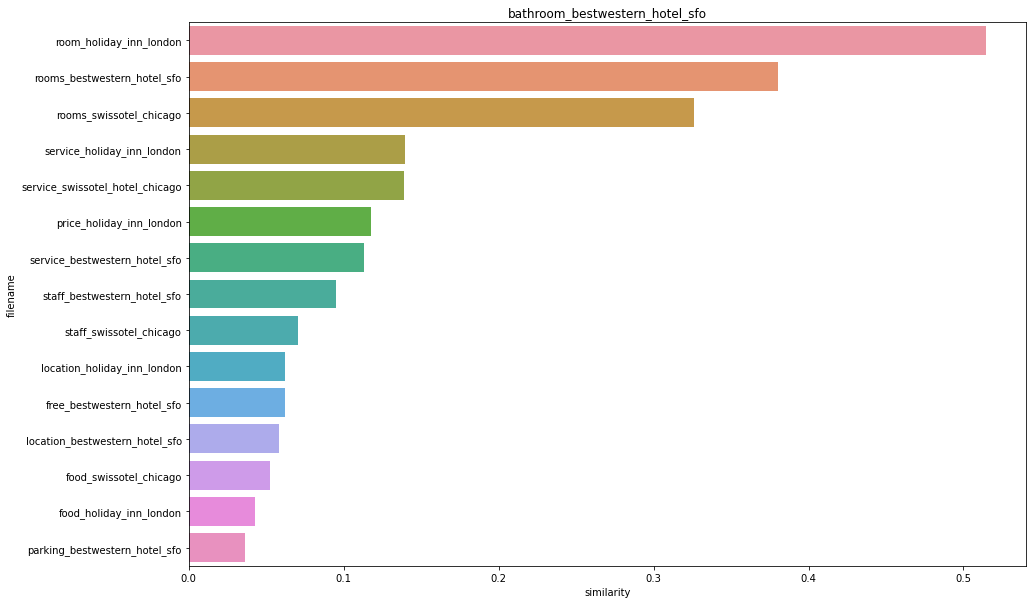

In [95]:
# 비교기준 문서와 다른 문서들간의 유사도 살펴보기
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# array 내림차순으로 정렬한 후 인덱스 반환 [:,::-1] 모든행에 대해서 열을 내림차순으로 정렬
sorted_idx = similarity.argsort()[:,::-1]

# 비교문서 당사자는 제외한 인덱스 추출
sorted_idx = sorted_idx[:, 1:]

# 유사도가 큰 순으로 hotel_idx(label=1) 즉, 호텔과관련된 내용의 문서이름들의 index에서 재정렬 
# index로 넣으려면 1차원으로 reshape해주기!
hotel_sorted_idx = hotel_idx[sorted_idx.reshape(-1,)]

# 유사도 행렬값들을 유사도가 큰 순으로 재정렬(비교 문서 당사자는 제외)
hotel_sim_values = np.sort(similarity.reshape(-1,))[::-1]
hotel_sim_values = hotel_sim_values[1:]

# 이렇게 되면 비교문서와 가장 유사한 순으로 '해당문서의index-유사도값' 으로 동일한 위치가 매핑된 두 개의 array
# 그래서 그대로 데이터프레임의 각 칼럼으로 넣어주기
print(hotel_sorted_idx)
print(hotel_sim_values)
print()
print("길이 비교", len(hotel_sorted_idx), len(hotel_sim_values))
print()

# 빈 데이터프레임 생성
hotel_sim_df = pd.DataFrame()

# hotel_sorted_idx 와 hotel_sim_values 매핑시킨 array임
hotel_sim_df['filename'] = document_df.iloc[hotel_sorted_idx]['filename']
hotel_sim_df['similarity'] = hotel_sim_values

plt.figure(figsize=(15,10))
sns.barplot(data=hotel_sim_df, x='similarity', y='filename')
plt.title(comparison_doc)

가장 유사도가 높은 내용들의 문서는 주로 'room'에 대한 주제의 문서임을 알 수 있다.